In [1]:
from IPython import get_ipython


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js



In [3]:
import random
import math
from random import randint,uniform



In [4]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None, size = 3):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        self.s = size
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self, title = None):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker, s = collection.s)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()

        if title is not None:
            plt.title(label= title)
        
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})



In [5]:


# zbiór a
def aDataset():
    cords = (-1000, 1000)
    d = [(uniform(cords[0], cords[1]), uniform(cords[0], cords[1])) for _ in range(10**5)]
    
    with open("a.txt", "w") as fp:
        js.dump(d, fp)

    return d



In [6]:



# zbiór b
def bDataset():
    cords = (-10 ** 14, 10 ** 14)

    d = [(uniform(cords[0], cords[1]), uniform(cords[0], cords[1])) for _ in range(10**5)]

    with open("b.txt", "w") as fp:
        js.dump(d, fp)
    
    return d



In [7]:


# zbior c okrag
def cDataset():
    n = 1000
    r = 100
    d = [None] * n
    p = (0.0, 0.0)
    for i in range(n):
        alpha = random.random() * (2*math.pi)
        d[i] = (p[0] + r*math.sin(alpha), p[1] + r*math.cos(alpha))

    with open("c.txt", "w") as fp:
        js.dump(d, fp)
    
    return d



In [8]:



# zbior d prosta
def dDataset():
    n = 1000

    p1 = (-1.0, 0.0)
    p2 = (1.0, 0.1)

    lineA = (p1[1] - p2[1]) / (p1[0] - p2[0])
    lineB = p1[1] - lineA * p1[0]

    d = [None] * n
    for i in range(n):
        x = uniform(-1000,1000)
        d[i] = (x, lineA*x + lineB)


    with open("d.txt", "w") as fp:
        js.dump(d, fp)
    
    return d



In [9]:

def plotDataset(d):
    Plot([PointsCollection(d)]).draw()



In [10]:
def det3x3(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - c[0]*b[1] - a[1]*b[0] - a[0]*c[1]



In [11]:
def det2x2(a,b,c):
    return (a[0] - c[0])*(b[1] - c[1]) - (a[1] - c[1])*(b[0] - c[0])



In [12]:
def detNp3x3(a,b,c):
    arr = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    return np.linalg.det(arr)



In [13]:
def detNp2x2(a,b,c):
    arr = np.array([[a[0] - c[0], a[1] - c[1]], [b[0] - c[0], b[1] - c[1]]])
    return np.linalg.det(arr)



In [14]:
def classify(points, detFun, e = 10** -14, a = (-1.0,0.0), b = (1.0,0.1)):
    left = []
    right = []
    collinear = []

    for p in points:
        d = detFun(a,b,p)

        if d > e:
            left.append(p)
        elif d < -e:
            right.append(p)
        else:
            collinear.append(p)
 
    return left, collinear, right



In [15]:
def plotClassification(points, detFun, e = 10**-14, a = (-1.0,0.0), b = (1.0,0.1)):
    
    left, collinear, right = classify(points, detFun, e, a, b)

    
    classified = [PointsCollection(left, color='blue'),
                  PointsCollection(right, color='green'),
                  PointsCollection(collinear, color= 'pink')]


    Plot(classified).draw()

    print("Left: ", len(left))
    print("Right: ",len(right))
    print("Collinear: ",len(collinear))



In [16]:
def countDiff(points, detFun1, detFun2, e = 10**-14, a = (-1.0,0.0), b = (1.0,0.1), show = True):
    #czerwone to punkty sklasyfikowane przez detFun1 jako wspolliniowe, a detFun2 nie
    #zielone to punkty sklasyfikowane przez detFun2 jako wpolliniowe, a detFun1 nie
    def cat(p, f):
        d = f(a,b,p)

        if d > e:
            return 'l'
        elif d < -e:
            return 'r'
        else:
            return 'c'
    res1 = []
    res2 = []        
    for p in points:
        if cat(p,detFun1) != cat(p,detFun2):
            if cat(p, detFun1) != 'c':
                res2.append(p)
            else:
                res1.append(p)
            

    if show is True:
        Plot([PointsCollection(res1, color= 'red'),PointsCollection(res2, color='green')]).draw()

    print ("Difference:",len(res1)+len(res2))



In [17]:
from pathlib import Path
def load():
    file = Path("a.txt")
    if file.is_file():
        with open(file, "r") as fp:
            a = js.load(fp)
    else:
        a = aDataset()
    
    file = Path("b.txt")
    if file.is_file():
        with open(file, "r") as fp:
            b = js.load(fp)
    else:
        b = bDataset()
    
    file = Path("c.txt")
    if file.is_file():
        with open(file, "r") as fp:
            c = js.load(fp)
    else:
        c = cDataset()
    
    file = Path("d.txt")
    if file.is_file():
        with open(file, "r") as fp:
            d = js.load(fp)
    else:
        d = dDataset()

    return a, b, c, d
a,b,c,d = load()



In [18]:
def resetDatasets():
    global a,b,c,d
    a = aDataset()
    b = bDataset()
    c = cDataset()
    d = dDataset()



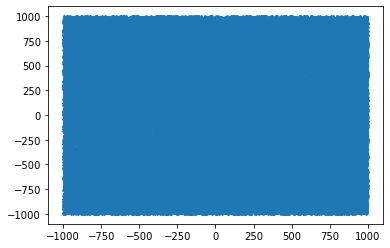

In [19]:
%matplotlib inline

plotDataset(a)



In [20]:
epsilon = 0



Left:  49961
Right:  50039
Collinear:  0


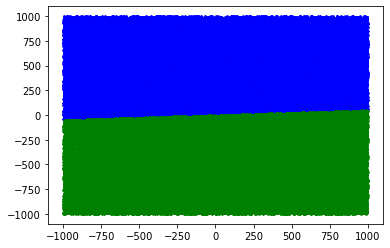

In [21]:
%matplotlib inline 

plotClassification(a,det2x2,e = epsilon)



Left:  49961
Right:  50039
Collinear:  0


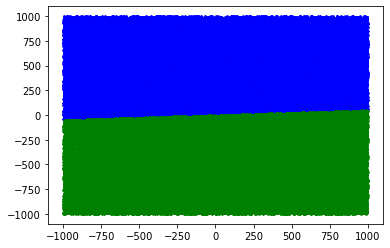

In [22]:
%matplotlib inline 

plotClassification(a,det3x3,e= epsilon)



Difference: 0


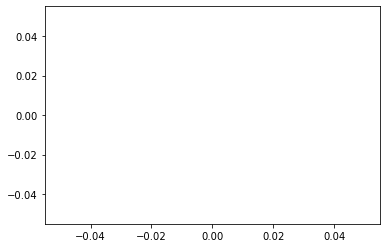

In [23]:
%matplotlib inline

countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


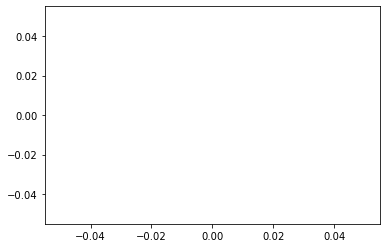

In [24]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


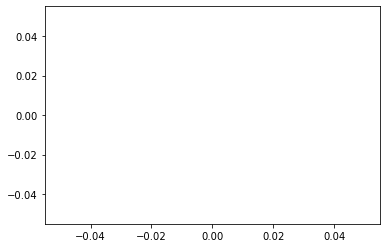

In [25]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)



In [26]:
epsilon = 10**-14



Left:  49961
Right:  50039
Collinear:  0


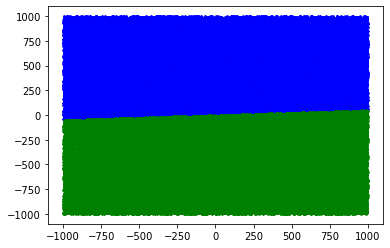

In [27]:
%matplotlib inline

plotClassification(a,det2x2,e = epsilon)



Left:  49961
Right:  50039
Collinear:  0


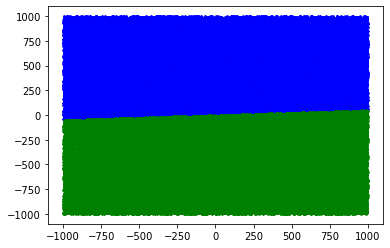

In [28]:
%matplotlib inline

plotClassification(a,det3x3,e= epsilon)



Difference: 0


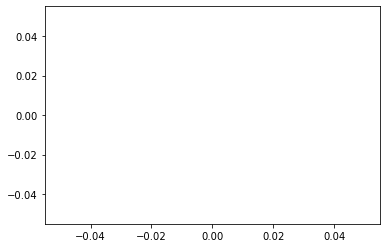

In [29]:
%matplotlib inline
countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


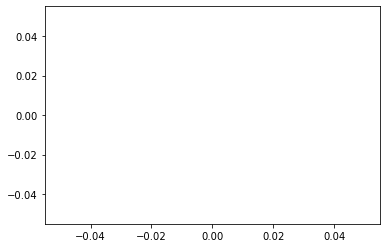

In [30]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


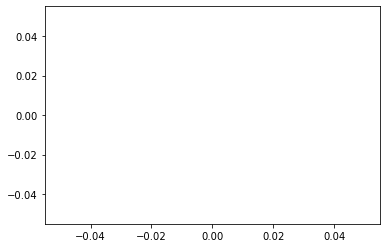

In [31]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)



In [32]:
epsilon = 10**-5



Left:  49961
Right:  50039
Collinear:  0


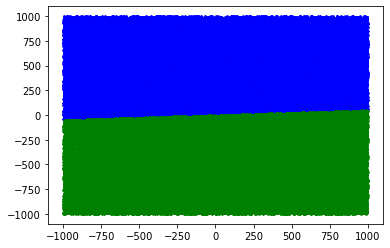

In [33]:
%matplotlib inline

plotClassification(a,det2x2,e = epsilon)



Left:  49961
Right:  50039
Collinear:  0


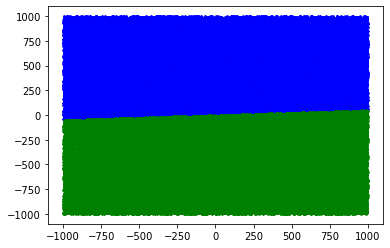

In [34]:
%matplotlib inline

plotClassification(a,det3x3,e= epsilon)



Difference: 0


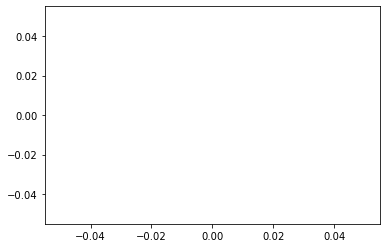

In [35]:
%matplotlib inline
countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


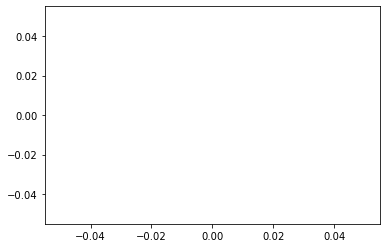

In [36]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


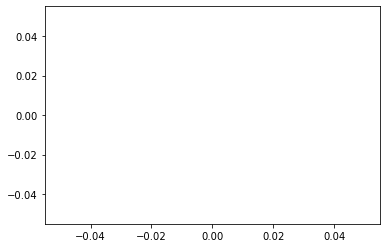

In [37]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)



In [38]:
epsilon = 10**-2



Left:  49961
Right:  50039
Collinear:  0


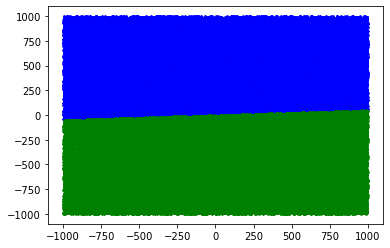

In [39]:
%matplotlib inline

plotClassification(a,det2x2,e = epsilon)



Left:  49961
Right:  50039
Collinear:  0


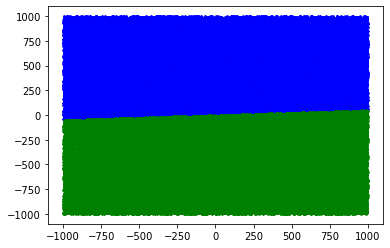

In [40]:
%matplotlib inline

plotClassification(a,det3x3,e= epsilon)



Difference: 0


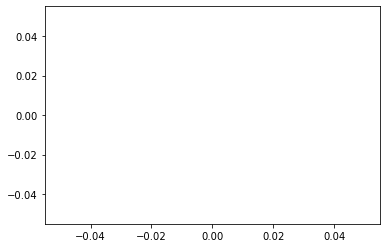

In [41]:
%matplotlib inline
countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


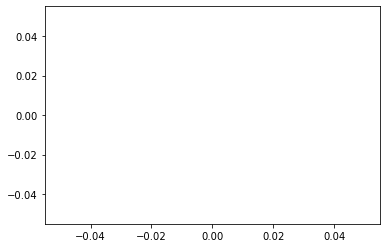

In [42]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


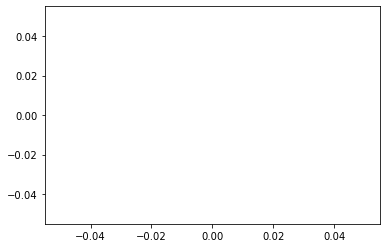

In [43]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)



In [44]:
epsilon = 1



Left:  49935
Right:  50015
Collinear:  50


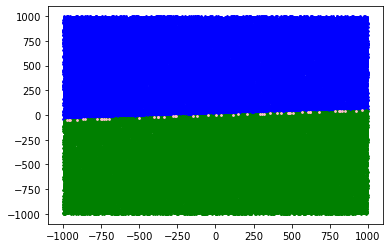

In [45]:
%matplotlib inline
plotClassification(a,det2x2,e = epsilon)



Left:  49935
Right:  50015
Collinear:  50


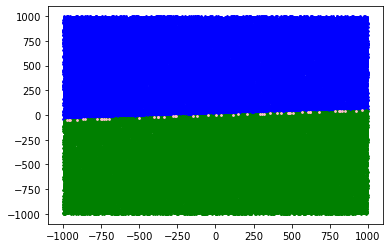

In [46]:
%matplotlib inline
plotClassification(a,det3x3,e= epsilon)



Difference: 0


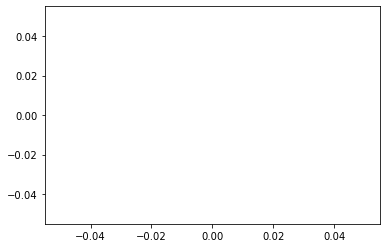

In [47]:
%matplotlib inline
countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


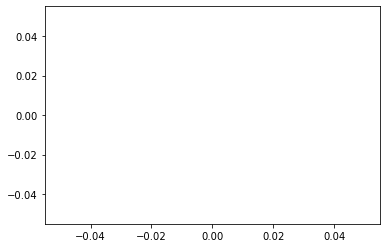

In [48]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


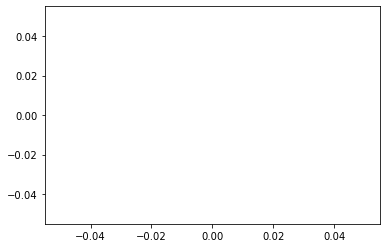

In [49]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)


In [50]:
epsilon = 10



Left:  49707
Right:  49796
Collinear:  497


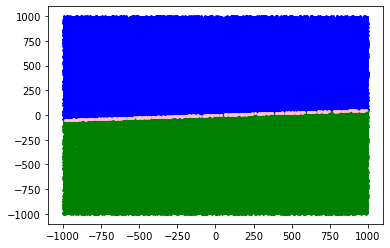

In [51]:
%matplotlib inline

plotClassification(a,det2x2,e = epsilon)



Left:  49707
Right:  49796
Collinear:  497


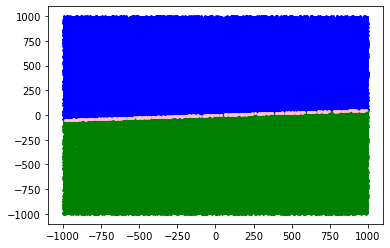

In [52]:
%matplotlib inline
plotClassification(a,det3x3,e= epsilon)



Difference: 0


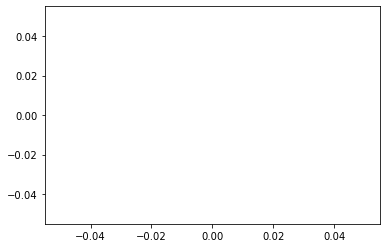

In [53]:
%matplotlib inline
countDiff(a,det2x2,det3x3, e=epsilon)



Difference: 0


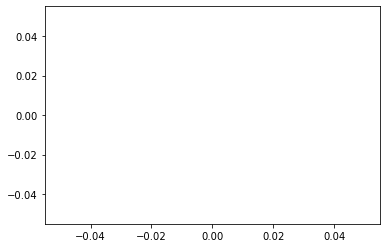

In [54]:
%matplotlib inline
countDiff(a,det2x2,detNp2x2, e=epsilon)



Difference: 0


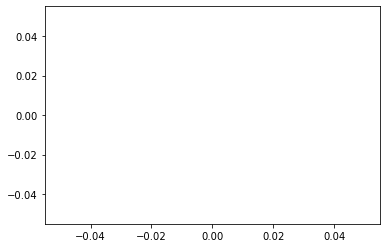

In [55]:
%matplotlib inline
countDiff(a,det3x3,detNp3x3, e=epsilon)
    



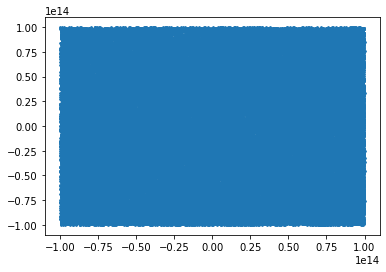

In [56]:
%matplotlib inline

plotDataset(b)


In [57]:
epsilon = 0



Left:  50065
Right:  49931
Collinear:  4


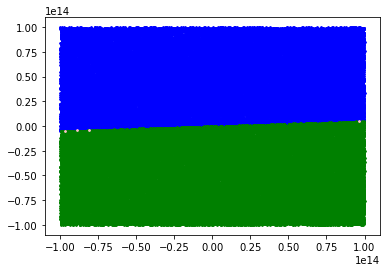

In [58]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  50066
Right:  49934
Collinear:  0


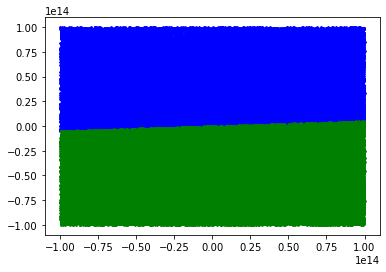

In [59]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 4


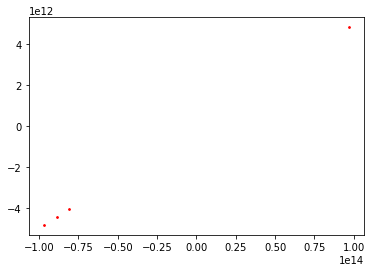

In [60]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 4


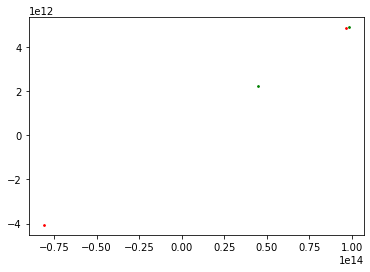

In [61]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


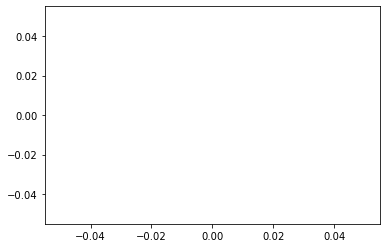

In [62]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)



In [63]:
epsilon = 10**0



Left:  50065
Right:  49931
Collinear:  4


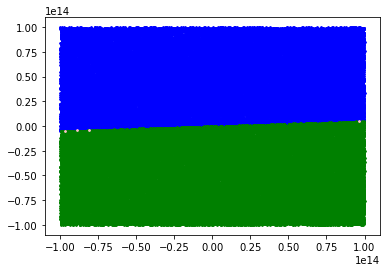

In [64]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  50066
Right:  49934
Collinear:  0


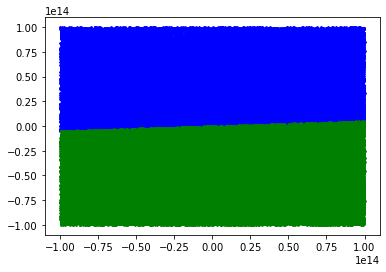

In [65]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 4


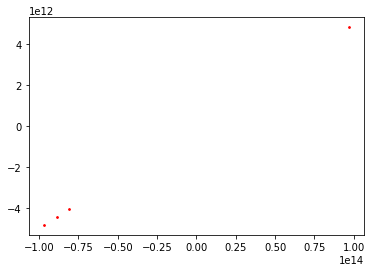

In [66]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 4


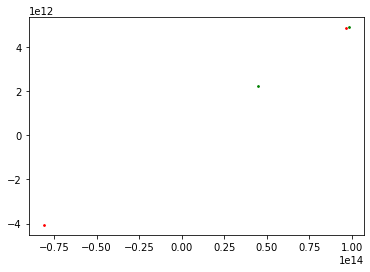

In [67]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


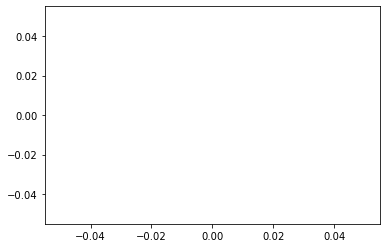

In [68]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)



In [69]:
epsilon = 10**7



Left:  50065
Right:  49931
Collinear:  4


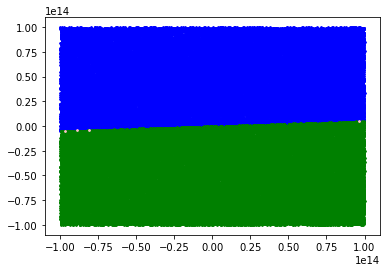

In [70]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  50066
Right:  49934
Collinear:  0


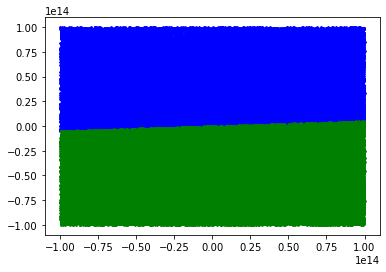

In [71]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 4


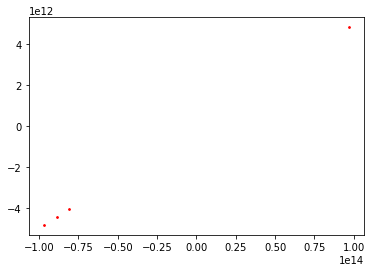

In [72]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 4


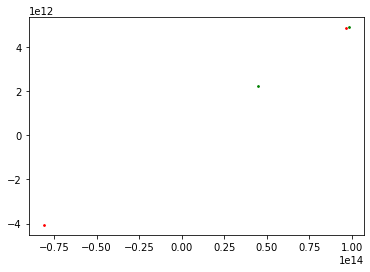

In [73]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


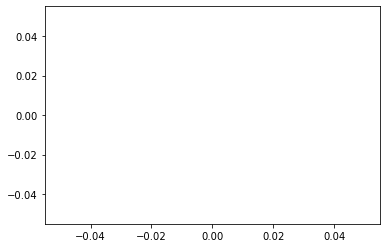

In [74]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)




In [75]:
epsilon = 10**10



Left:  50065
Right:  49929
Collinear:  6


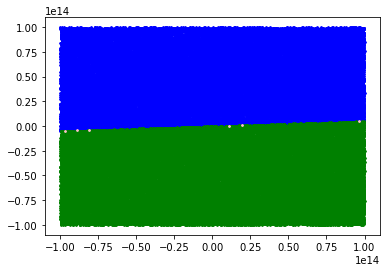

In [76]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  50065
Right:  49929
Collinear:  6


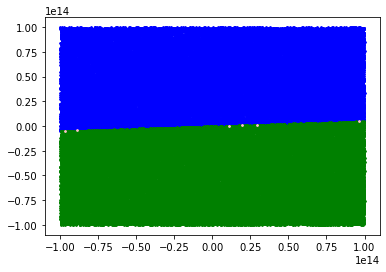

In [77]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 2


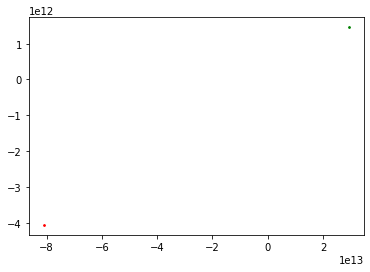

In [78]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 5


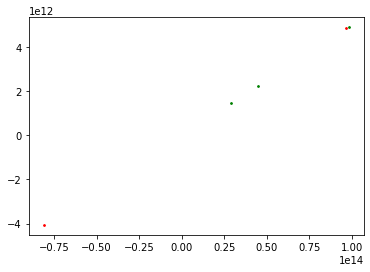

In [79]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


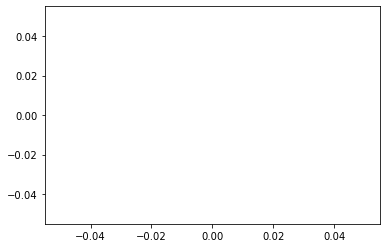

In [80]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)



In [81]:
epsilon = 10**11



Left:  50040
Right:  49909
Collinear:  51


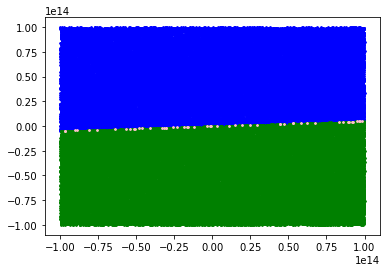

In [82]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  50039
Right:  49911
Collinear:  50


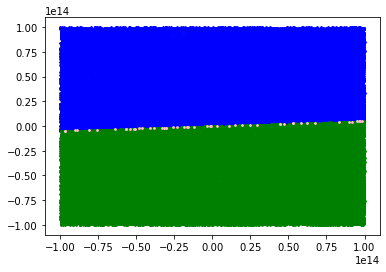

In [83]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 5


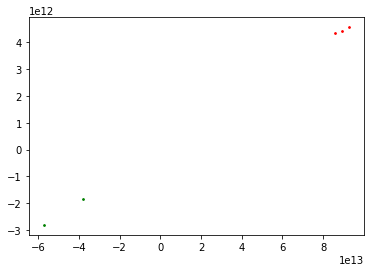

In [84]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 6


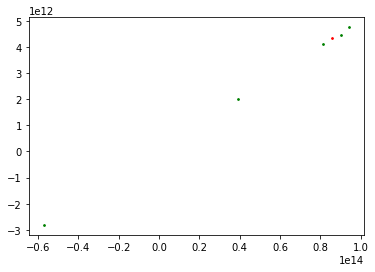

In [85]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


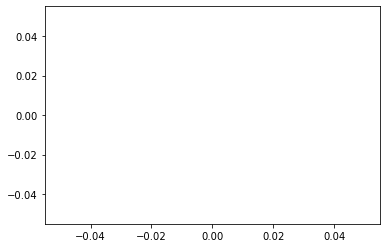

In [86]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)



In [87]:
epsilon = 10**12



Left:  49827
Right:  49679
Collinear:  494


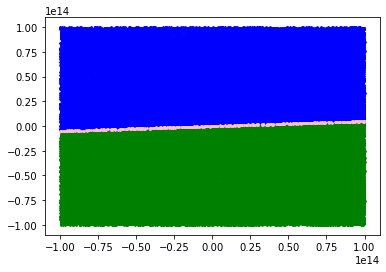

In [88]:
%matplotlib inline

plotClassification(b,det2x2,e = epsilon)



Left:  49826
Right:  49679
Collinear:  495


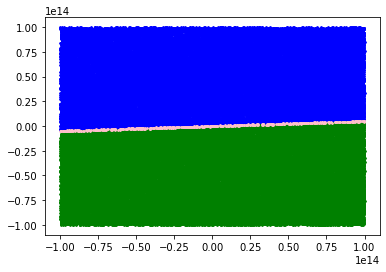

In [89]:
%matplotlib inline

plotClassification(b,det3x3,e= epsilon)



Difference: 5


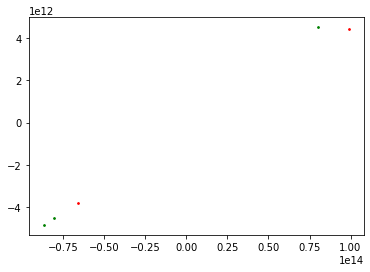

In [90]:
%matplotlib inline
countDiff(b,det2x2,det3x3, e=epsilon)



Difference: 10


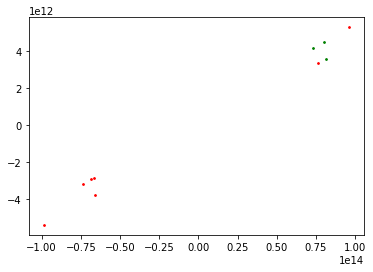

In [91]:
%matplotlib inline
countDiff(b,det2x2,detNp2x2, e=epsilon)



Difference: 0


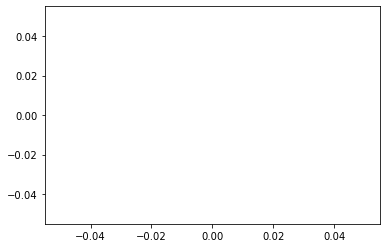

In [92]:
%matplotlib inline
countDiff(b,det3x3,detNp3x3, e=epsilon)



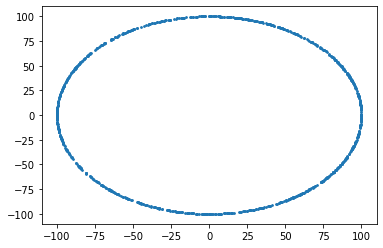

In [93]:
%matplotlib inline

plotDataset(c)

In [94]:
epsilon = 10**-14



Left:  501
Right:  499
Collinear:  0


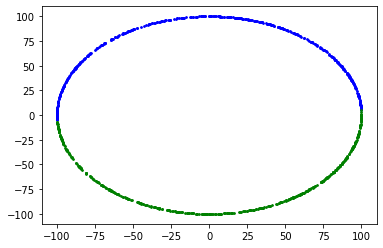

In [95]:
%matplotlib inline

plotClassification(c,det2x2,e = epsilon)



Left:  501
Right:  499
Collinear:  0


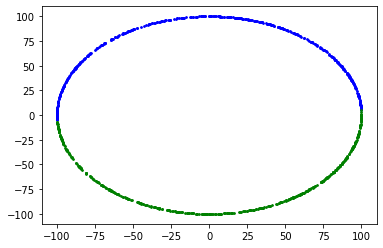

In [96]:
%matplotlib inline

plotClassification(c,det3x3,e= epsilon)



Difference: 0


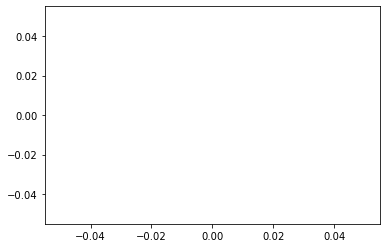

In [97]:
%matplotlib inline
countDiff(c,det2x2,det3x3, e=epsilon)



Difference: 0


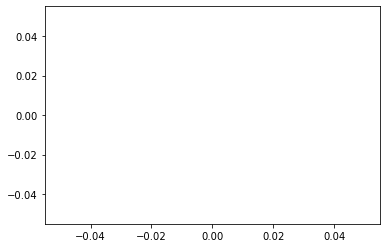

In [98]:
%matplotlib inline
countDiff(c,det2x2,detNp2x2, e=epsilon)



Difference: 0


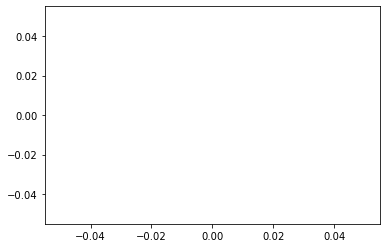

In [99]:
%matplotlib inline
countDiff(c,det3x3,detNp3x3, e=epsilon)



In [100]:
epsilon = 10**-7



Left:  501
Right:  499
Collinear:  0


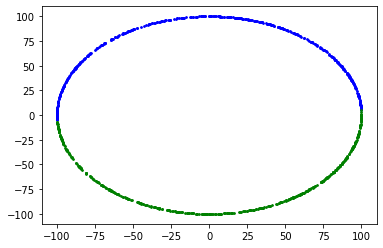

In [101]:
%matplotlib inline

plotClassification(c,det2x2,e = epsilon)



Left:  501
Right:  499
Collinear:  0


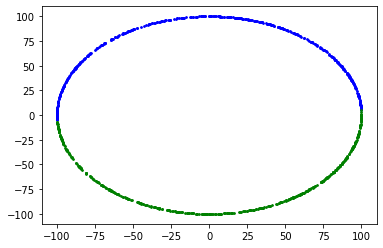

In [102]:
%matplotlib inline

plotClassification(c,det3x3,e= epsilon)



Difference: 0


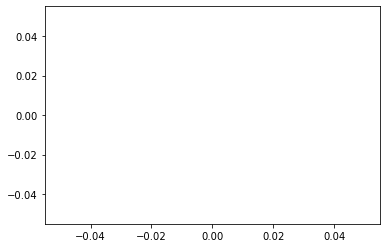

In [103]:
%matplotlib inline
countDiff(c,det2x2,det3x3, e=epsilon)



Difference: 0


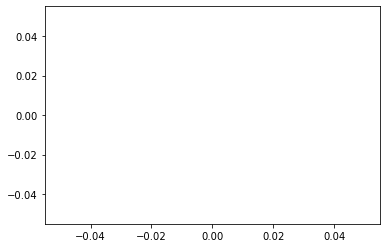

In [104]:
%matplotlib inline
countDiff(c,det2x2,detNp2x2, e=epsilon)



Difference: 0


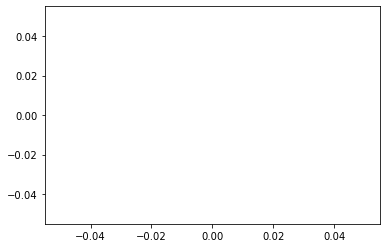

In [105]:
%matplotlib inline
countDiff(c,det3x3,detNp3x3, e=epsilon)



In [106]:
epsilon = 10**-2



Left:  501
Right:  499
Collinear:  0


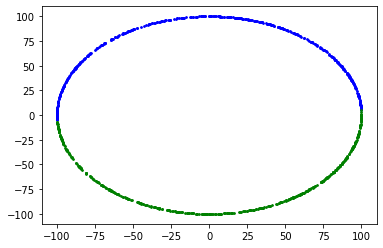

In [107]:
%matplotlib inline

plotClassification(c,det2x2,e = epsilon)



Left:  501
Right:  499
Collinear:  0


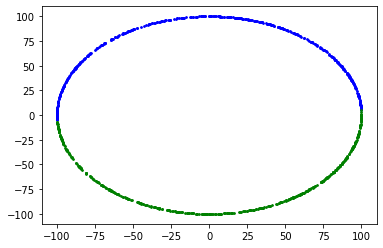

In [108]:
%matplotlib inline

plotClassification(c,det3x3,e= epsilon)



Difference: 0


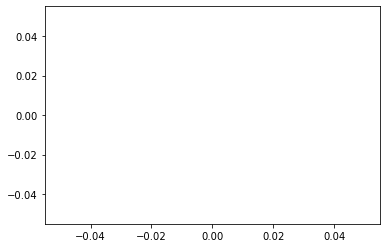

In [109]:
%matplotlib inline
countDiff(c,det2x2,det3x3, e=epsilon)



Difference: 0


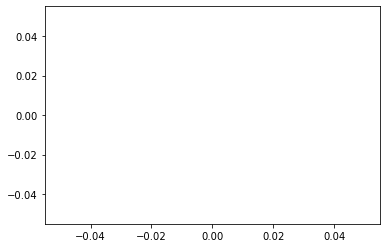

In [110]:
%matplotlib inline
countDiff(c,det2x2,detNp2x2, e=epsilon)



Difference: 0


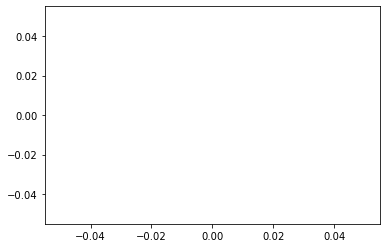

In [111]:
%matplotlib inline
countDiff(c,det3x3,detNp3x3, e=epsilon)



In [112]:
epsilon = 10**0



Left:  499
Right:  498
Collinear:  3


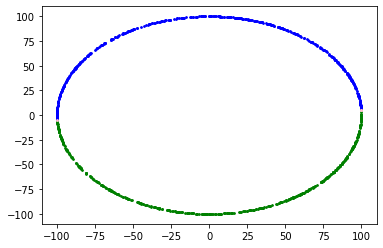

In [113]:
%matplotlib inline

plotClassification(c,det2x2,e = epsilon)



Left:  499
Right:  498
Collinear:  3


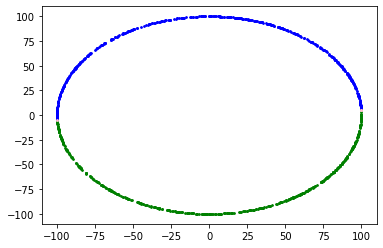

In [114]:
%matplotlib inline

plotClassification(c,det3x3,e= epsilon)



Difference: 0


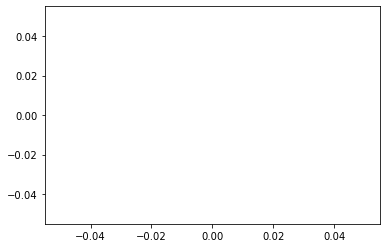

In [115]:
%matplotlib inline
countDiff(c,det2x2,det3x3, e=epsilon)



Difference: 0


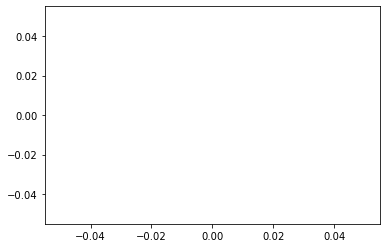

In [116]:
%matplotlib inline
countDiff(c,det2x2,detNp2x2, e=epsilon)



Difference: 0


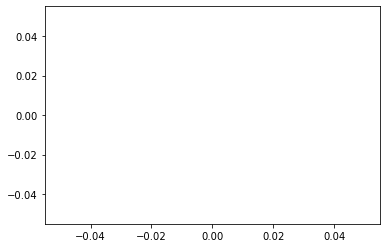

In [117]:
%matplotlib inline
countDiff(c,det3x3,detNp3x3, e=epsilon)



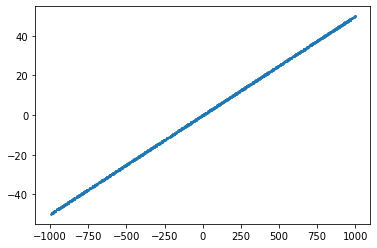

In [118]:
%matplotlib inline

plotDataset(d)


In [119]:
epsilon = 0

Left:  148
Right:  146
Collinear:  706


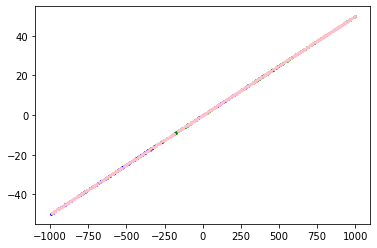

In [120]:
%matplotlib inline

plotClassification(d,det2x2,e = epsilon)


Left:  155
Right:  419
Collinear:  426


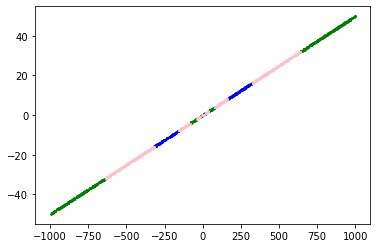

In [121]:
%matplotlib inline

plotClassification(d,det3x3,e= epsilon)

Difference: 690


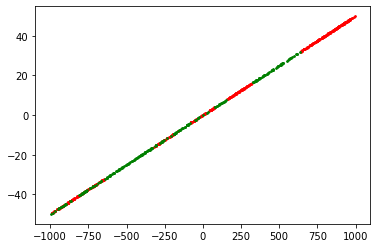

In [122]:
%matplotlib inline
countDiff(d,det2x2,det3x3, e=epsilon)

Difference: 382


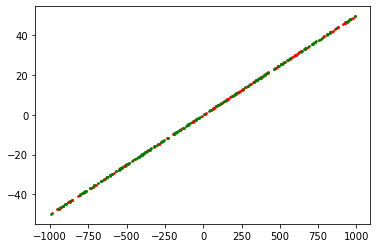

In [123]:
%matplotlib inline
countDiff(d,det2x2,detNp2x2, e=epsilon)

Difference: 541


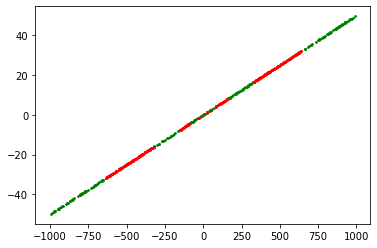

In [124]:
%matplotlib inline
countDiff(d,det3x3,detNp3x3, e=epsilon)

In [125]:
epsilon = 10**-16



Left:  148
Right:  145
Collinear:  707


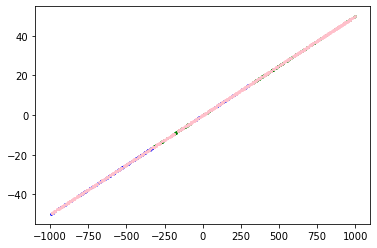

In [126]:
%matplotlib inline

plotClassification(d,det2x2,e = epsilon)



Left:  155
Right:  413
Collinear:  432


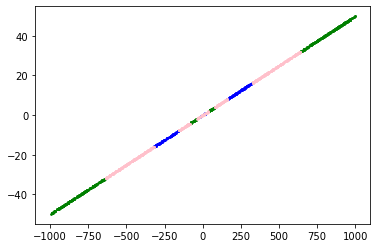

In [127]:
%matplotlib inline

plotClassification(d,det3x3,e= epsilon)



Difference: 687


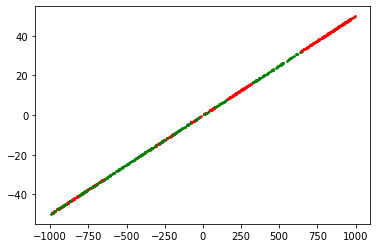

In [128]:
%matplotlib inline
countDiff(d,det2x2,det3x3, e=epsilon)



Difference: 382


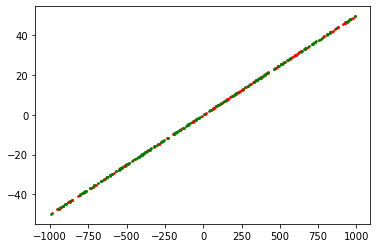

In [129]:
%matplotlib inline
countDiff(d,det2x2,detNp2x2, e=epsilon)



Difference: 537


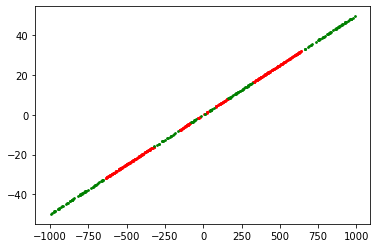

In [130]:
%matplotlib inline
countDiff(d,det3x3,detNp3x3, e=epsilon)



In [131]:
epsilon = 10**-14



Left:  144
Right:  141
Collinear:  715


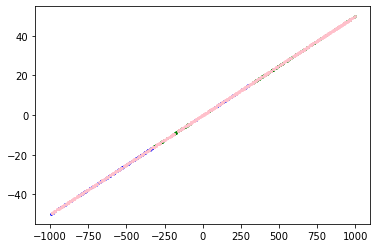

In [132]:
%matplotlib inline

plotClassification(d,det2x2,e = epsilon)



Left:  0
Right:  0
Collinear:  1000


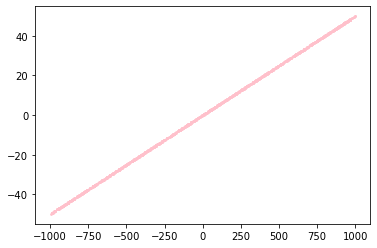

In [133]:
%matplotlib inline

plotClassification(d,det3x3,e= epsilon)



Difference: 285


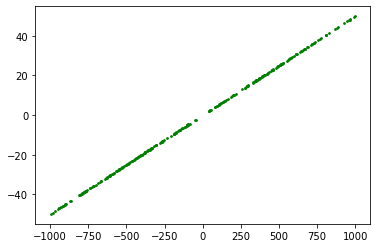

In [134]:
%matplotlib inline
countDiff(d,det2x2,det3x3, e=epsilon)



Difference: 372


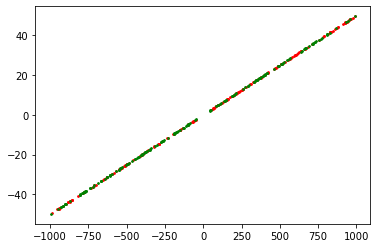

In [135]:
%matplotlib inline
countDiff(d,det2x2,detNp2x2, e=epsilon)



Difference: 121


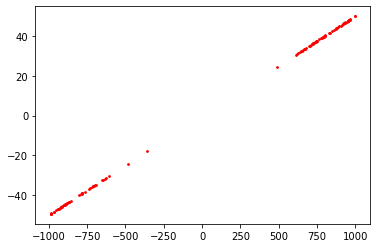

In [136]:
%matplotlib inline
countDiff(d,det3x3,detNp3x3, e=epsilon)



In [137]:
epsilon = 10**-12



Left:  89
Right:  71
Collinear:  840


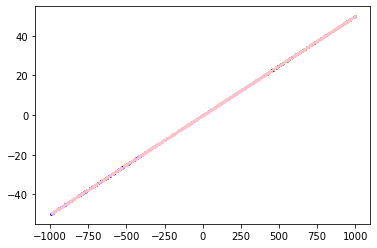

In [138]:
%matplotlib inline

plotClassification(d,det2x2,e = epsilon)



Left:  0
Right:  0
Collinear:  1000


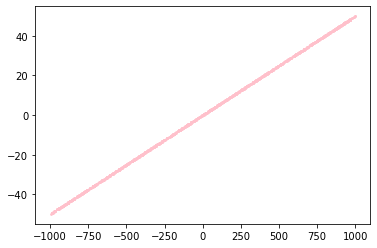

In [139]:
%matplotlib inline

plotClassification(d,det3x3,e= epsilon)



Difference: 160


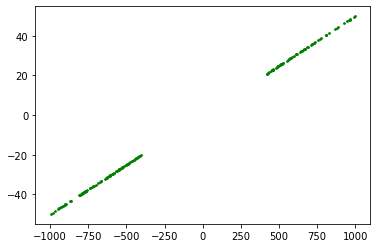

In [140]:
%matplotlib inline
countDiff(d,det2x2,det3x3, e=epsilon)



Difference: 244


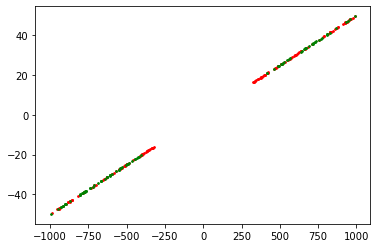

In [141]:
%matplotlib inline
countDiff(d,det2x2,detNp2x2, e=epsilon)



Difference: 0


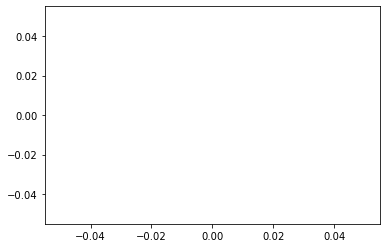

In [142]:
%matplotlib inline
countDiff(d,det3x3,detNp3x3, e=epsilon)



In [143]:
epsilon = 10**-10



Left:  0
Right:  0
Collinear:  1000


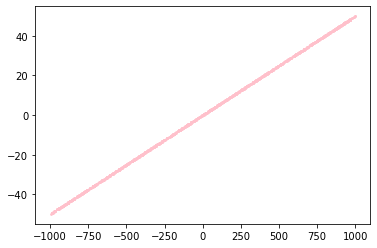

In [144]:
%matplotlib inline

plotClassification(d,det2x2,e = epsilon)



Left:  0
Right:  0
Collinear:  1000


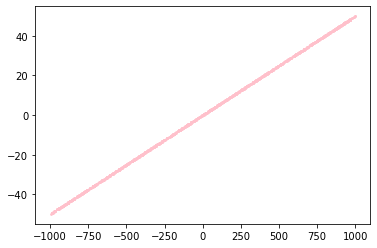

In [145]:
%matplotlib inline

plotClassification(d,det3x3,e= epsilon)



Difference: 0


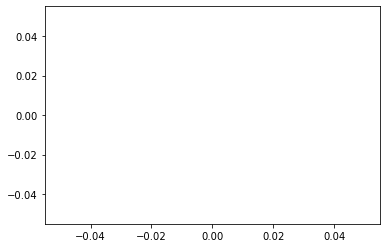

In [146]:
%matplotlib inline
countDiff(d,det2x2,det3x3, e=epsilon)



Difference: 0


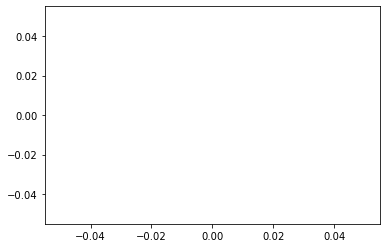

In [147]:
%matplotlib inline
countDiff(d,det2x2,detNp2x2, e=epsilon)



Difference: 0


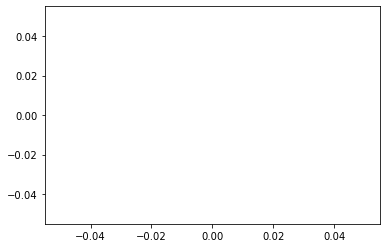

In [148]:
%matplotlib inline
countDiff(d,det3x3,detNp3x3, e=epsilon)


